In [4]:
!pip install -Uqq fastai
!pip install duckduckgo_search

  Obtaining dependency information for duckduckgo_search from https://files.pythonhosted.org/packages/ca/5d/47ae6b1054fedb4aed5cc5c5c36479748245ce09128bce596fc45095f69e/duckduckgo_search-4.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for click>=8.1.7 from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl.metadata
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Obtaining dependency information for curl-cffi>=0.5.10 from https://files.pythonhosted.org/packages/4e/70/0d4d667287d54cb4daf8ce67068565c8e09e4f839a835119cd27f229a446/curl_cffi-0.5.10-cp37-abi3-win_amd64.whl.metadata
Using cached click-8.1.7-py3-none-any.whl (97 kB)
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.6 MB 5.2 MB/s eta 0:00:01
   ------------- -------------------------- 0.9/2.6 MB 9.6 MB/s eta 0:00:01
   ----------------------- 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
python-lsp-black 1.2.1 requires black>=22.3.0, but you have black 0.0 which is incompatible.


In [5]:
from duckduckgo_search import ddg_images
from fastcore.all import *

In [6]:
def search_images(term, max_images=50):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results = max_images)).itemgot('image')

Searching for 'comedy movie posters'


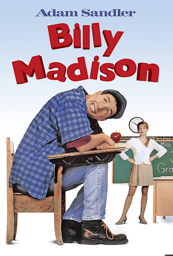

In [8]:
from fastdownload import download_url
urls = search_images('comedy movie posters', max_images=1)
dest = 'comedyMovie.jpg'
download_url(urls[0], dest, show_progress=True)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'action movie posters'


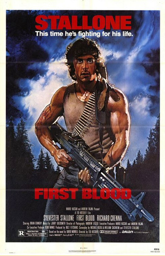

In [12]:
download_url(search_images('action movie posters', max_images=1)[0], 'actionMovie.jpg', show_progress=True)
Image.open('actionMovie.jpg').to_thumb(256,256)

Searching for 'romance movie posters'


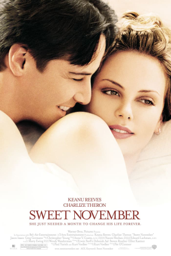

In [13]:
download_url(search_images('romance movie posters', max_images=1)[0], 'romanceMovie.jpg', show_progress=True)
Image.open('romanceMovie.jpg').to_thumb(256,256)

In [14]:
searches = 'romance movie posters', 'action movie posters', 'comedy movie posters'
path = Path('romance action or comedy')
from time import sleep

In [16]:
for term in searches:
    dest = (path/term)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{term}'))
    sleep(10)
    resize_images(path/term, max_size=400, dest=path/term)

Searching for 'romance movie posters'
Searching for 'action movie posters'
Searching for 'comedy movie posters'


In [17]:
failed = verify_images(get_image_files(path))
failed
failed.map(Path.unlink)
len(failed)

2

C:\Users\david\anaconda3\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


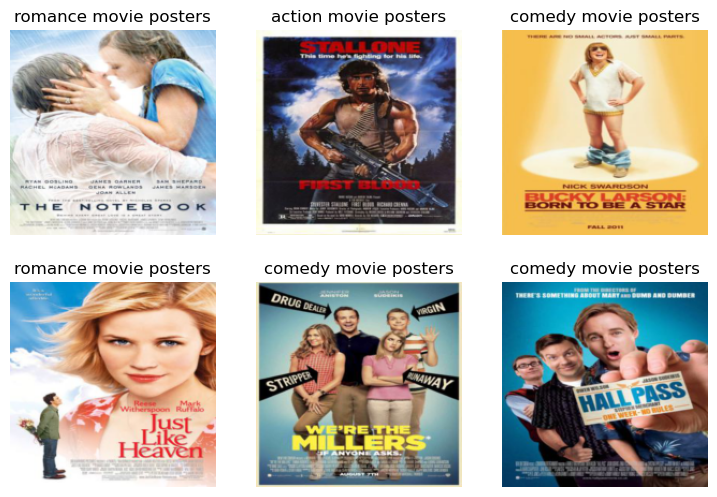

In [18]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(11)

epoch,train_loss,valid_loss,error_rate,time
0,2.367478,2.222721,0.750000,00:04


epoch,train_loss,valid_loss,error_rate,time
0,1.528840,1.705688,0.625000,00:05
1,1.124501,1.342547,0.562500,00:05
2,0.899789,1.160845,0.375000,00:05
3,0.702841,1.087838,0.312500,00:05
4,0.561329,1.118160,0.312500,00:05
5,0.462129,1.091375,0.312500,00:05
6,0.391029,1.088495,0.312500,00:05


In [ ]:
is_romance,_,probs = learn.predict(PILImage.create('romanceMovie.jpg'))
print(f"This is a: {is_romance}.")
print(f"Probability it's a romance movie: {probs[2]:.4f}")